solve > solving 441 dof system to machine precision using direct solver
solve > solver returned with residual 1e-16


<IPython.core.display.Javascript object>


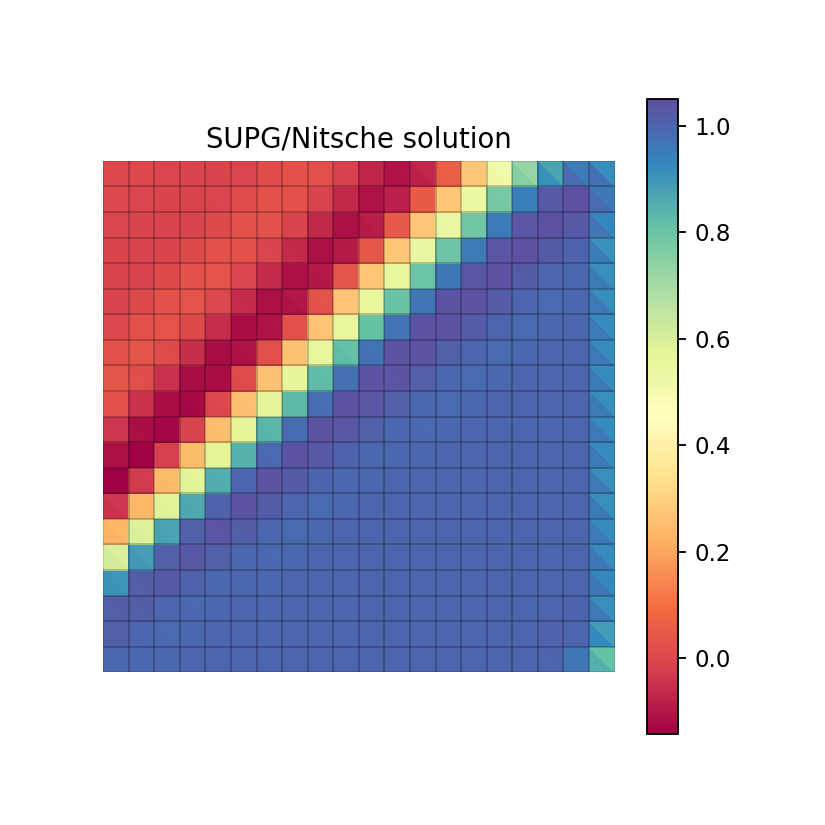

<IPython.core.display.Javascript object>


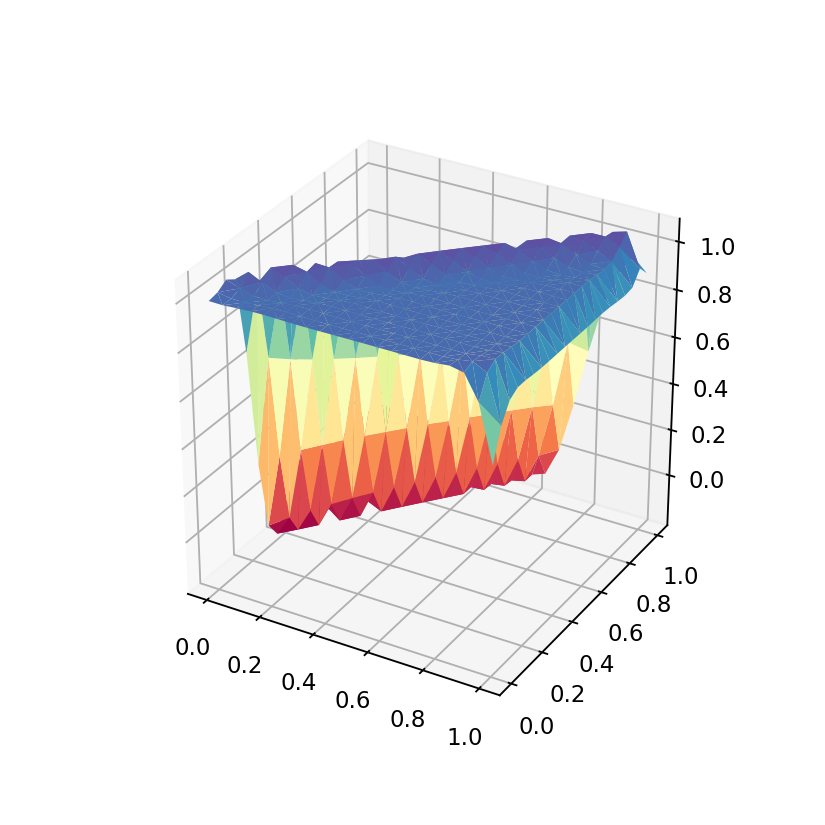

In [2]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
import inspect
from matplotlib import collections
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

degree = 1 #degree of basis functions. degree = 1 gives SUPG
nelems = 20 #number of elements along edge of unit square
etype = 'square' #square meshes

theta = np.pi/4
topo, geom =  ntl.mesh.unitsquare(nelems, etype) #rectilinear([np.linspace(0,1, nx), np.linspace(0,1, ny) ])
ns = ntl.function.Namespace()
ns.x = geom
ns.a= np.array([np.cos(theta), np.sin(theta)]) #advection
ns.kappa = 1e-6
ns.basis = topo.basis('spline', degree = degree)
ns.u = 'basis_i ?dofs_i'
ns.h = np.sqrt(2/nelems**2) #mesh size parameter
ns.s = -1 # 1 or -1 depending on whether you want symmetric or skew-symmetric 
ns.lamb = 17 # lagrange multiplier

#element intrinsic time scale
ns.anorm = '(a_i a_i)^.5'
ns.tau = 'h / (2 anorm)'


badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2)
ns.badbnd = badbnd[1]

#residual
res = topo.integral( '(kappa basis_i,j u_,j  + u_,n  a_n basis_i) d:x' @ ns, degree = degree * 2) 
res -= topo.boundary.integral('kappa basis_i u_,k n_k d:x' @ns, degree = degree * 2)
res += topo.integral( 'tau a_k basis_i,k (-kappa u_,jj + a_n u_,n)  d:x' @ ns, degree = degree * 2) 
    #weak BCs
res += topo.boundary['top'].integral('kappa lamb basis_i u / (h) d:x' @ ns, degree= degree * 2)
res += topo.boundary['right'].integral('kappa lamb basis_i u / (h) d:x' @ ns, degree= degree * 2)
res += topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / (h) d:x' @ ns, degree= degree * 2)
res += topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / (h)  d:x' @ ns, degree= degree * 2)

res -= topo.boundary['top'].integral('s kappa basis_i,j u n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['right'].integral('s kappa  basis_i,j u n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['bottom'].integral('s kappa basis_i,j (u - 1) n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['left'].integral('s kappa basis_i,j (u - badbnd) n_j d:x' @ ns, degree= degree * 2)


lhs = ntl.solver.solve_linear('dofs', res)

bezier = topo.sample('bezier', 2)
x = bezier.eval('x_i' @ ns)
u = bezier.eval('u' @ ns, dofs = lhs)

#ntl.export.triplot('ADSM_GLS.png', x, u, tri=bezier.tri, hull=bezier.hull)
fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(111, aspect= 'equal')
im = ax.tripcolor(x[:,0], x[:, 1], bezier.tri, u, cmap= plt.cm.Spectral)
fig.colorbar(im)
ax.autoscale(enable= True, axis = 'both', tight = 'True')
ax.set_title('SUPG/Nitsche solution')
ax.add_collection(collections.LineCollection(x[bezier.hull], colors='k', linewidths= .1))
plt.axis('off')

fig2 = plt.figure(figsize= (5,5))
ax2 = fig2.add_subplot(111, projection ='3d')
ax2.plot_trisurf( x[:, 0], x[:,1], u, cmap=plt.cm.Spectral)

solve > solving 441 dof system to machine precision using direct solver
solve > solver returned with residual 1e-16


<IPython.core.display.Javascript object>


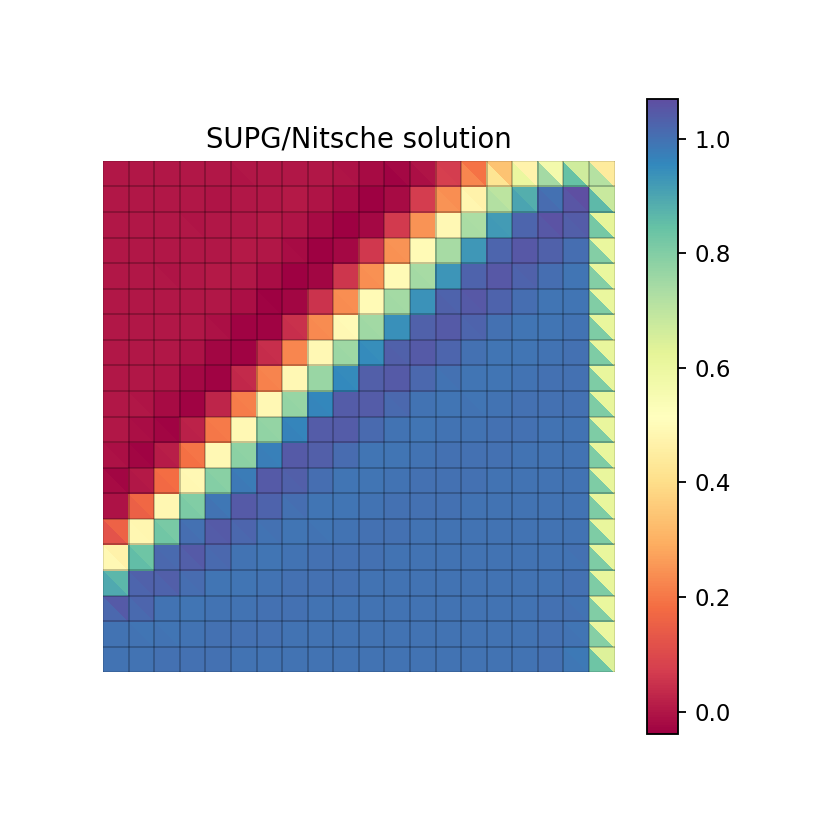

<IPython.core.display.Javascript object>


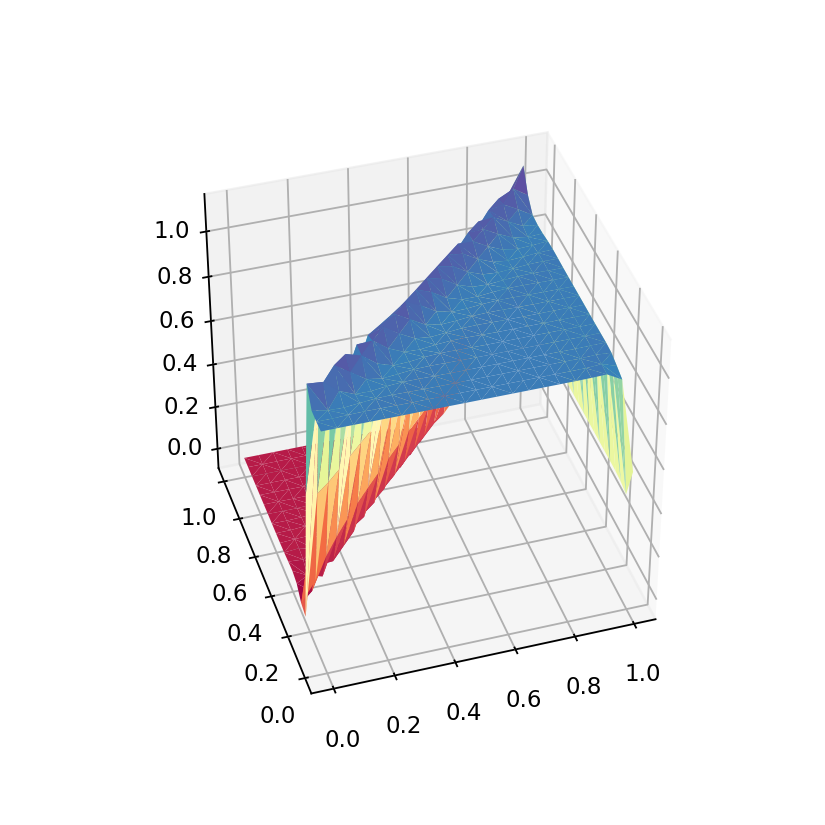

In [5]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
import inspect
from matplotlib import collections
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

degree = 1 #degree of basis functions. degree = 1 gives SUPG
nelems = 20 #number of elements along edge of unit square
etype = 'square' #square meshes

theta = np.pi/4
topo, geom =  ntl.mesh.unitsquare(nelems, etype) #rectilinear([np.linspace(0,1, nx), np.linspace(0,1, ny) ])
ns = ntl.function.Namespace()
ns.x = geom
ns.a= np.array([np.cos(theta), np.sin(theta)]) #advection
ns.kappa = 1e-6
ns.basis = topo.basis('lagrange', degree = degree)
ns.u = 'basis_i ?dofs_i'
ns.h = np.sqrt(2/nelems**2) #mesh size parameter
ns.s = 1 # 1 or -1 depending on whether you want symmetric or skew-symmetric 
ns.lamb = 70000 # lagrange multiplier
ns.w = 1 / ns.h

#element intrinsic time scale
ns.anorm = '(a_i a_i)^.5'
ns.tau = 'h / (2 anorm)'


badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2)
ns.badbnd = badbnd[1]

#residual
res = topo.integral( '(kappa basis_i,j u_,j  + u_,n  a_n basis_i) d:x' @ ns, degree = degree * 2) 
res -= topo.boundary.integral('kappa basis_i u_,k n_k d:x' @ns, degree = degree * 2)
res += topo.integral( 'tau a_k basis_i,k (-kappa u_,jj + a_n u_,n)  d:x' @ ns, degree = degree * 2) 
    #weak BCs
#res += topo.boundary['top'].integral('kappa lamb basis_i u / h d:x' @ ns, degree= degree * 2)
#res += topo.boundary['right'].integral('kappa lamb basis_i u / h d:x' @ ns, degree= degree * 2)
#res += topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / h d:x' @ ns, degree= degree * 2)
#res += topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / h  d:x' @ ns, degree= degree * 2)
res += topo.boundary['top'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
res += topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
res += topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ ns, degree= degree * 2)
res += topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ ns, degree= degree * 2)


res -= topo.boundary['top'].integral('s kappa basis_i,j u n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['right'].integral('s kappa  basis_i,j u n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['bottom'].integral('s kappa basis_i,j (u - 1) n_j d:x' @ ns, degree= degree * 2)
res -= topo.boundary['left'].integral('s kappa basis_i,j (u - badbnd) n_j d:x' @ ns, degree= degree * 2)


lhs = ntl.solver.solve_linear('dofs', res)

bezier = topo.sample('bezier', 2)
x = bezier.eval('x_i' @ ns)
u = bezier.eval('u' @ ns, dofs = lhs)

#ntl.export.triplot('ADSM_GLS.png', x, u, tri=bezier.tri, hull=bezier.hull)
fig = plt.figure(figsize= (5,5))
ax = fig.add_subplot(111, aspect= 'equal')
im = ax.tripcolor(x[:,0], x[:, 1], bezier.tri, u, cmap= plt.cm.Spectral)
fig.colorbar(im)
ax.autoscale(enable= True, axis = 'both', tight = 'True')
ax.set_title('SUPG/Nitsche solution')
ax.add_collection(collections.LineCollection(x[bezier.hull], colors='k', linewidths= .1))
plt.axis('off')

fig2 = plt.figure(figsize= (5,5))
ax2 = fig2.add_subplot(111, projection ='3d')
ax2.plot_trisurf( x[:, 0], x[:,1], u, cmap=plt.cm.Spectral)

In [31]:
r1es = topo.boundary['top'].integral('kappa lamb basis_i u / h  d:x' @ ns, degree= degree * 2)
#r1es = topo.boundary['right'].integral('kappa lamb basis_i u / h d:x' @ ns, degree= degree * 2)
#r1es = topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / h d:x' @ ns, degree= degree * 2)
#r1es = topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / h  d:x' @ ns, degree= degree * 2)

r4es = topo.boundary['top'].integral('kappa lamb basis_i u / (h) d:x' @ ns, degree= degree * 2)
#r4es = topo.boundary['right'].integral('kappa lamb basis_i u / h d:x' @ ns, degree= degree * 2)
#r4es = topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / h d:x' @ ns, degree= degree * 2)
#r4es = topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / h  d:x' @ ns, degree= degree * 2)

r2es = topo.boundary['top'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
#r2es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
#r2es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ ns, degree= degree * 2)
#r2es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ ns, degree= degree * 2)

r3es = topo.boundary['top'].integral('((1 / h) kappa lamb basis_i u) d:x' @ ns, degree= degree * 2)
#r3es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
#r3es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ ns, degree= degree * 2)
#r3es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ ns, degree= degree * 2)

r5es = topo.boundary['top'].integral('(( kappa lamb basis_i u) / h ) d:x' @ ns, degree= degree * 2)
#r5es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
#r5es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ ns, degree= degree * 2)
#r5es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ ns, degree= degree * 2)

r6es = topo.boundary['top'].integral('( kappa lamb basis_i basis_j ?dofs_j w ) d:x' @ ns, degree= degree * 2)
#r6es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ ns, degree= degree * 2)
#r6es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ ns, degree= degree * 2)
#r6es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ ns, degree= degree * 2)

print(np.array_equal(r1es.eval(dofs = lhs), r6es.eval(dofs = lhs) ))
#print(r1es.eval(dofs = lhs))
#print('\n',)

False


In [36]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt

nelems = 4
degree = 2
top, x = ntl.mesh.rectilinear([np.linspace(0, 1, nelems + 1)])
nam = ntl.function.Namespace()
nam.x = x
nam.a= [1] #np.array([np.cos(theta), np.sin(theta)]) #advection
nam.kappa = 1e-6
nam.N = top.basis('lagrange', degree = degree)
nam.u = 'N_i ?dofs_i'
nam.h = np.sqrt(2/nelems**2) #mesh size parameter
nam.s = -1 # 1 or -1 depending on whether you want symmetric or skew-symmetric 
nam.lamb = 17 # lagrange multiplier
nam.w = 1 / nam.h

ris = top.integral( '(kappa N_i,j u_,j  + u_,n  a_n N_i) d:x' @ nam, degree = degree * 2) 
ris -= top.boundary['left'].integral('s kappa N_i,j (u - 1) n_j d:x' @ nam, degree= degree * 2)
lhs = ntl.solver.solve_linear('dofs', ris)

r1es = top.integral('kappa lamb N_i u / h  d:x' @ nam, degree= degree * 2)
#r1es = topo.boundary['right'].integral('kappa lamb basis_i u / h d:x' @ nam, degree= degree * 2)
#r1es = topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / h d:x' @ nam, degree= degree * 2)
#r1es = topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / h  d:x' @ nam, degree= degree * 2)

r4es = top.integral('kappa lamb N_i u / (h) d:x' @ nam, degree= degree * 2)
#r4es = topo.boundary['right'].integral('kappa lamb basis_i u / h d:x' @ nam, degree= degree * 2)
#r4es = topo.boundary['bottom'].integral('kappa lamb basis_i (u - 1) / h d:x' @ nam, degree= degree * 2)
#r4es = topo.boundary['left'].integral('kappa lamb basis_i (u - badbnd) / h  d:x' @ nam, degree= degree * 2)

r2es = top.integral('(1 / h) kappa lamb N_i u d:x' @ nam, degree= degree * 2)
#r2es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ nam, degree= degree * 2)
#r2es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ nam, degree= degree * 2)
#r2es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ nam, degree= degree * 2)

r3es = top.integral('((1 / h) kappa lamb N_i u) d:x' @ nam, degree= degree * 2)
#r3es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ nam, degree= degree * 2)
#r3es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ nam, degree= degree * 2)
#r3es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ nam, degree= degree * 2)

r5es = top.integral('(( kappa lamb N_i u) / h ) d:x' @ nam, degree= degree * 2)
#r5es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ nam, degree= degree * 2)
#r5es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ nam, degree= degree * 2)
#r5es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ nam, degree= degree * 2)

r6es = top.integral('( kappa lamb N_i u w ) d:x' @ nam, degree= degree * 2)
#r6es = topo.boundary['right'].integral('(1 / h) kappa lamb basis_i u d:x' @ nam, degree= degree * 2)
#r6es = topo.boundary['bottom'].integral('(1 / h) kappa lamb basis_i (u - 1) d:x' @ nam, degree= degree * 2)
#r6es = topo.boundary['left'].integral('(1 / h) kappa lamb basis_i (u - badbnd) d:x' @ nam, degree= degree * 2)

print(np.array_equal(r1es.eval(dofs = lhs), r4es.eval(dofs = lhs) ))
#print(r1es.eval(dofs = lhs))
#print('\n',)

nam.huh = '((1 / h) lamb kappa)'
nam.huh2 = 'lamb kappa / h'

print(nam.huh.eval(), nam.huh2.eval())

solve > solving 9 dof system to machine precision using direct solver
solve > solver returned with residual 2e-16
True
[4.80832611e-05] [4.80832611e-05]


In [37]:
r0 = top.integral(' 5 (2) / 5  d:x ' @nam, degree= degree * 2)
r1  = top.integral(' x_0  d:x ' @nam, degree= degree * 2)
r2 = top.integral(' x_0 / d:x ' @nam, degree= degree * 2)

print(r0.eval(), '\n', r1.eval(), '\n', r2.eval())

31.999999999999996 
 0.5 
 8.0


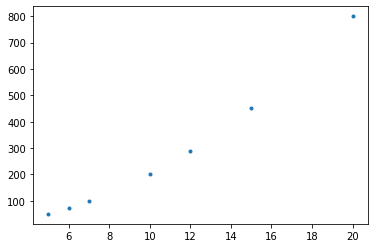

In [31]:
a= [5 ,6 ,7 ,10, 12, 20, 15]
b= [50, 72, 98, 200, 288, 800, 450]

plt.plot(a, b, '.')